                 Bank  Year  Revenue  Net_Income  Assets  Equity  Deposits  \
0        Emirates NBD  2015    10000        2000   50000    7000     30000   
1  Dubai Islamic Bank  2015     8000        1500   40000    6000     25000   
2             Mashreq  2015     6000        1200   30000    5000     20000   
3        Emirates NBD  2016    11000        2100   52000    7200     31000   
4  Dubai Islamic Bank  2016     8500        1600   41000    6100     25500   

   Loans  SharePrice  Dividends  
0  20000        12.5        1.2  
1  18000        10.2        1.0  
2  15000         8.7        0.8  
3  21000        13.0        1.3  
4  18500        10.5        1.1  
                     ROA    ROE  Net_Profit_Margin  Loan_to_Deposit  \
Bank                                                                  
Dubai Islamic Bank  3.83  25.61              18.79            72.27   
Emirates NBD        4.02  28.87              19.55            67.20   
Mashreq             4.10  24.75            

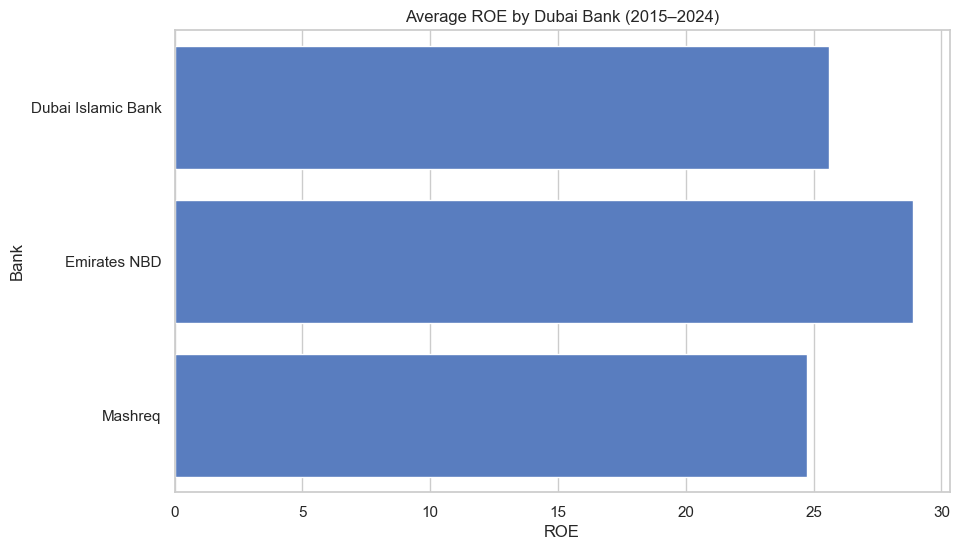

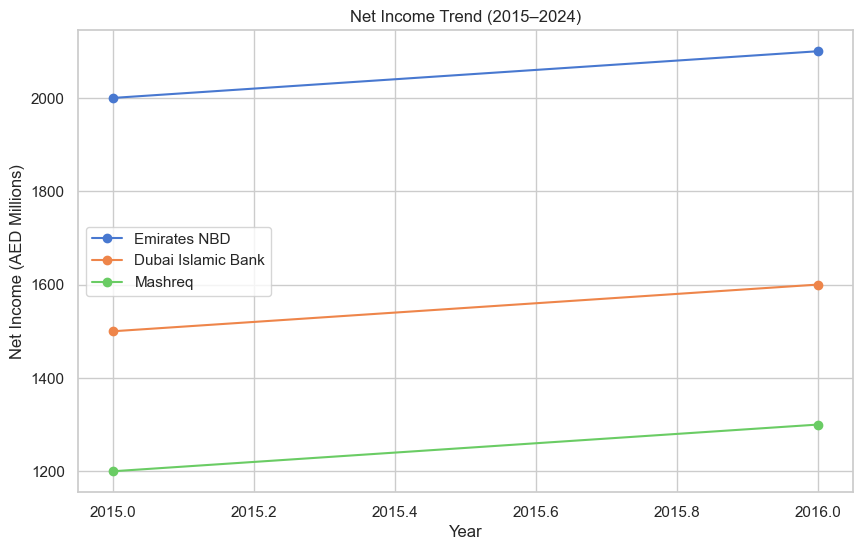

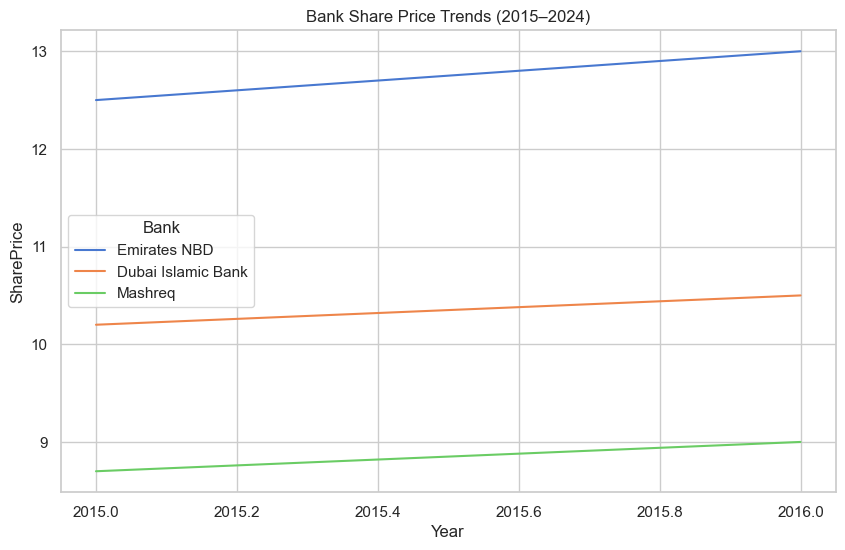

Forecasted Net Income (next 3 years):
[1735.8416515929123, 1559.957102964378, 1630.9355749236336]


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
# --------------------------------------
# 1. Import Libraries
# --------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   # ✅ this was missing
from statsmodels.tsa.arima.model import ARIMA



# Visualization settings
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10,6)

# --------------------------------------
# 2. Load Data
# --------------------------------------
# Example: bank financials in Excel (2015–2024)
# Columns: Bank, Year, Revenue, Net_Income, Assets, Equity, Deposits, Loans, SharePrice, Dividends

# Create sample data if file does not exist
import os
if not os.path.exists("dubai_banks_data.xlsx"):
    sample_data = {
        "Bank": ["Emirates NBD", "Dubai Islamic Bank", "Mashreq", "Emirates NBD", "Dubai Islamic Bank", "Mashreq"],
        "Year": [2015, 2015, 2015, 2016, 2016, 2016],
        "Revenue": [10000, 8000, 6000, 11000, 8500, 6500],
        "Net_Income": [2000, 1500, 1200, 2100, 1600, 1300],
        "Assets": [50000, 40000, 30000, 52000, 41000, 31000],
        "Equity": [7000, 6000, 5000, 7200, 6100, 5100],
        "Deposits": [30000, 25000, 20000, 31000, 25500, 20500],
        "Loans": [20000, 18000, 15000, 21000, 18500, 15500],
        "SharePrice": [12.5, 10.2, 8.7, 13.0, 10.5, 9.0],
        "Dividends": [1.2, 1.0, 0.8, 1.3, 1.1, 0.9]
    }
    pd.DataFrame(sample_data).to_excel("dubai_banks_data.xlsx", index=False)

df = pd.read_excel("dubai_banks_data.xlsx")

# Preview
print(df.head())

# --------------------------------------
# 3. Data Cleaning
# --------------------------------------
# Handle missing values
df.fillna(0, inplace=True)

# Ensure numeric types
numeric_cols = ["Revenue", "Net_Income", "Assets", "Equity", "Deposits", "Loans", "SharePrice", "Dividends"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# --------------------------------------
# 4. Financial Ratio Calculations
# --------------------------------------
df["ROA"] = df["Net_Income"] / df["Assets"] * 100
df["ROE"] = df["Net_Income"] / df["Equity"] * 100
df["Net_Profit_Margin"] = df["Net_Income"] / df["Revenue"] * 100
df["Loan_to_Deposit"] = df["Loans"] / df["Deposits"] * 100
df["Dividend_Yield"] = df["Dividends"] / df["SharePrice"] * 100

# --------------------------------------
# 5. Descriptive Analysis
# --------------------------------------
# Average metrics by bank
summary = df.groupby("Bank")[["ROA","ROE","Net_Profit_Margin","Loan_to_Deposit","Dividend_Yield"]].mean().round(2)
print(summary)

# --------------------------------------
# 6. Visualization
# --------------------------------------

# A. ROE Comparison
sns.barplot(x="ROE", y="Bank", data=summary.reset_index())
plt.title("Average ROE by Dubai Bank (2015–2024)")
plt.show()

# B. Net Profit Trend
for bank in df["Bank"].unique():
    bank_data = df[df["Bank"] == bank]
    plt.plot(bank_data["Year"], bank_data["Net_Income"], marker="o", label=bank)
plt.title("Net Income Trend (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Net Income (AED Millions)")
plt.legend()
plt.show()

# C. Share Price Trend
sns.lineplot(data=df, x="Year", y="SharePrice", hue="Bank")
plt.title("Bank Share Price Trends (2015–2024)")
plt.show()

# --------------------------------------
# 7. Forecasting Example (ARIMA)
# --------------------------------------
# Forecast Net Income for one bank (e.g., Emirates NBD)
bank_forecast = df[df["Bank"]=="Emirates NBD"].set_index("Year")["Net_Income"]

model = ARIMA(df["Net_Income"], order=(1,1,1))  # ✅ full series

def new_func(model):
    results = model.fit()
    return results

results = new_func(model)

forecast = results.forecast(steps=3)  # Forecast next 3 years
print("Forecasted Net Income (next 3 years):")
# Robust handling for forecast output
forecast_arr = np.array(forecast)
if forecast_arr.ndim == 0:
    print([forecast_arr.item()])
else:
    print(forecast_arr.flatten().tolist())

# --------------------------------------
# 8. Save Results
# --------------------------------------
summary.to_excel("dubai_bank_analysis_summary.xlsx", index=True)
